<a href="https://colab.research.google.com/github/pejmanrasti/EPU_ML_Angers_2025/blob/main/Jour_4/DL_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Make your fist experience with Tensorflow-Keras**
Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images.

## Loading Training and Validation Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf


In [2]:
from google.colab import drive
root = '/content/gdrive/'
drive.mount( root )

Mounted at /content/gdrive/


In [3]:
!unzip /content/gdrive/MyDrive/Formation_ICO/Jour3/data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Non_Demented/non_2057.jpg  
  inflating: __MACOSX/Non_Demented/._non_2057.jpg  
  inflating: Non_Demented/non_2731.jpg  
  inflating: __MACOSX/Non_Demented/._non_2731.jpg  
  inflating: Non_Demented/non_1238.jpg  
  inflating: __MACOSX/Non_Demented/._non_1238.jpg  
  inflating: Non_Demented/non_2725.jpg  
  inflating: __MACOSX/Non_Demented/._non_2725.jpg  
  inflating: Non_Demented/non_2043.jpg  
  inflating: __MACOSX/Non_Demented/._non_2043.jpg  
  inflating: Non_Demented/non_1562.jpg  
  inflating: __MACOSX/Non_Demented/._non_1562.jpg  
  inflating: Non_Demented/non_1204.jpg  
  inflating: __MACOSX/Non_Demented/._non_1204.jpg  
  inflating: Non_Demented/non_2719.jpg  
  inflating: __MACOSX/Non_Demented/._non_2719.jpg  
  inflating: Non_Demented/non_1210.jpg  
  inflating: __MACOSX/Non_Demented/._non_1210.jpg  
  inflating: Non_Demented/non_1576.jpg  
  inflating: __MACOSX/Non_Demented/._non_1576.jpg  
  inflating: Non_De

In [4]:
from tensorflow.keras.models import Sequential # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from tensorflow.keras.utils import to_categorical # NumPy related tools
from tensorflow.keras.callbacks import TensorBoard  #Visulization of Accuracy and loss

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
from glob import glob
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import os
sns.set()


In [5]:
#Dataset that should go with Alzheimer label
very_mild = glob('Very_Mild_Demented/*')
mild = glob('Mild_Demented/*')
moderate = glob('Moderate_Demented/*')

#Dataset without Alzheimer
non = glob('Non_Demented/*')

In [6]:
# Example:
images = []
labels = []
for img_path in very_mild:
  images.append(imread(img_path))  # Assuming you have a function to read image data
  labels.append(0) # 0 for 'very_mild'
for img_path in mild:
  images.append(imread(img_path))
  labels.append(1) # 1 for 'mild'
for img_path in moderate:
  images.append(imread(img_path))
  labels.append(2) # 2 for 'moderate'
for img_path in non:
  images.append(imread(img_path))
  labels.append(3) # 3 for 'non'

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


# Split data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.3, random_state=42
)
# Split data into train and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

# Now you have x_train, x_test, y_train, y_test ready for your model
# Use these variables to train and evaluate your model.


# **Importing necessary Libraries**

Visualization of some input images

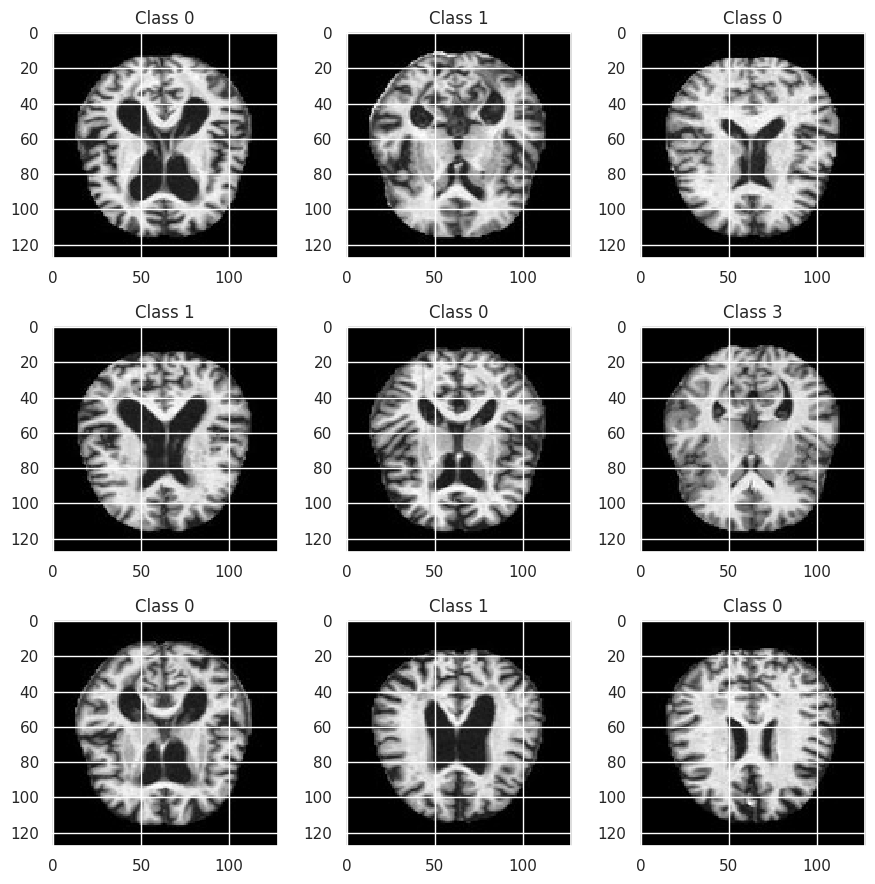

In [7]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector. Each image needs to be then reshaped (or flattened) into a vector.

In [8]:
# Get the correct number of features based on image dimensions
num_features = X_train.shape[1] * X_train.shape[2]

# Reshape X_train and X_val using the calculated num_features
X_train = X_train.reshape(X_train.shape[0], num_features).astype('float32')
X_val = X_val.reshape(X_val.shape[0], num_features).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train /= 255
X_val /= 255

We then modify our classes (unique digits) to be in the one-hot format, i.e.

In [9]:
# one hot encode outputs
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)

# Building the simplest fully connected network (FCN) with just one layer

In [10]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential([
    Dense(4,input_shape=(num_features,)), # It is the output layer and should be equal to the number of desired classes (10 in this case).
    Activation('softmax'),
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │          65,540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,540 (256.02 KB)

 Trainable params: 65,540 (256.02 KB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model

Keras is built on top of TensorFlow. It allows you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
! pip install livelossplot
from livelossplot import PlotLossesKeras
plotlosses = PlotLossesKeras()

## Train the model!

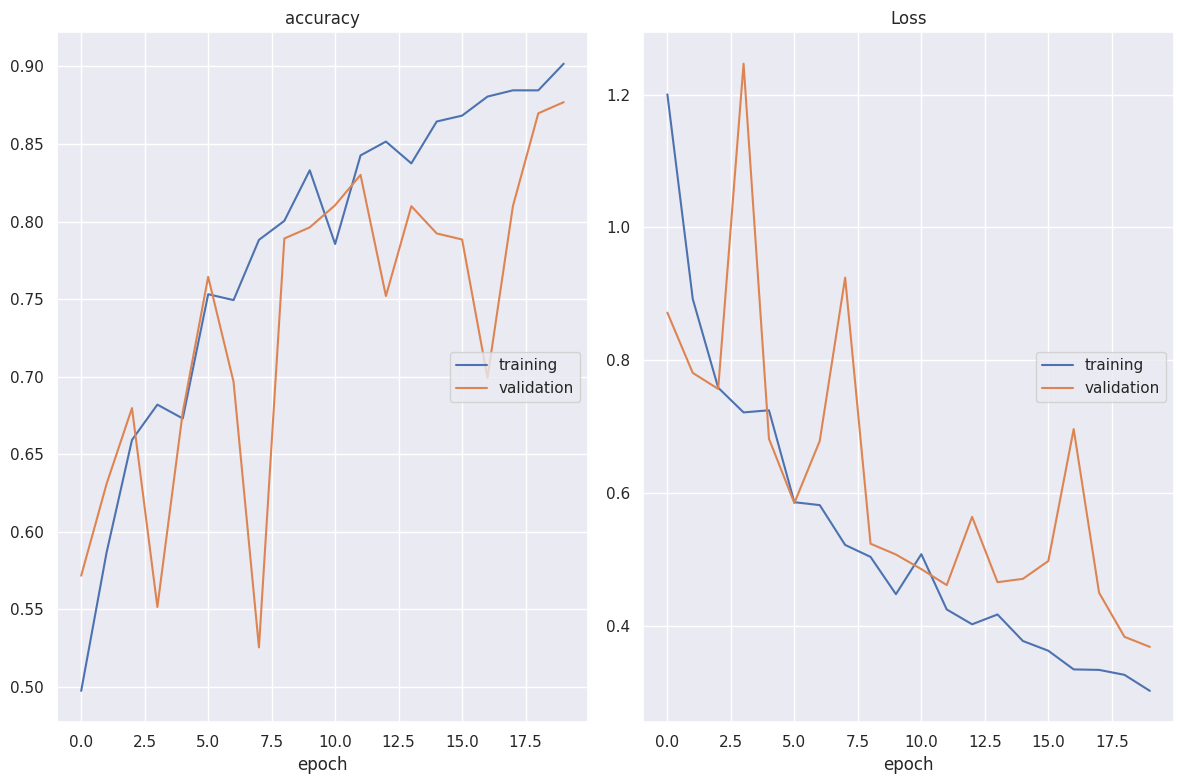

accuracy
	training         	 (min:    0.497, max:    0.902, cur:    0.902)
	validation       	 (min:    0.525, max:    0.877, cur:    0.877)
Loss
	training         	 (min:    0.302, max:    1.200, cur:    0.302)
	validation       	 (min:    0.368, max:    1.247, cur:    0.368)
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9121 - loss: 0.2865 - val_accuracy: 0.8770 - val_loss: 0.3682


In [13]:
model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20, batch_size=32,
          verbose=1,
          callbacks=[plotlosses])

## Evaluate Model's Accuracy on Test Data
Your test data **Must** be different from the validation data, but in this example, we will use the validation data as the test data as well.

In [18]:
Y_test = to_categorical(y_test)
X_test = X_test.reshape(X_test.shape[0], num_features).astype('float32')
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8409 - loss: 28.9729 
Test score: 33.41642379760742
Test accuracy: 0.8411458134651184


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [19]:
# The predict function outputs the probabilities for each class
# np.argmax finds the index of the class with the highest probability
predicted_classes = np.argmax(model.predict(X_val), axis=-1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_val)[0]

incorrect_indices = np.nonzero(predicted_classes != y_val)[0]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


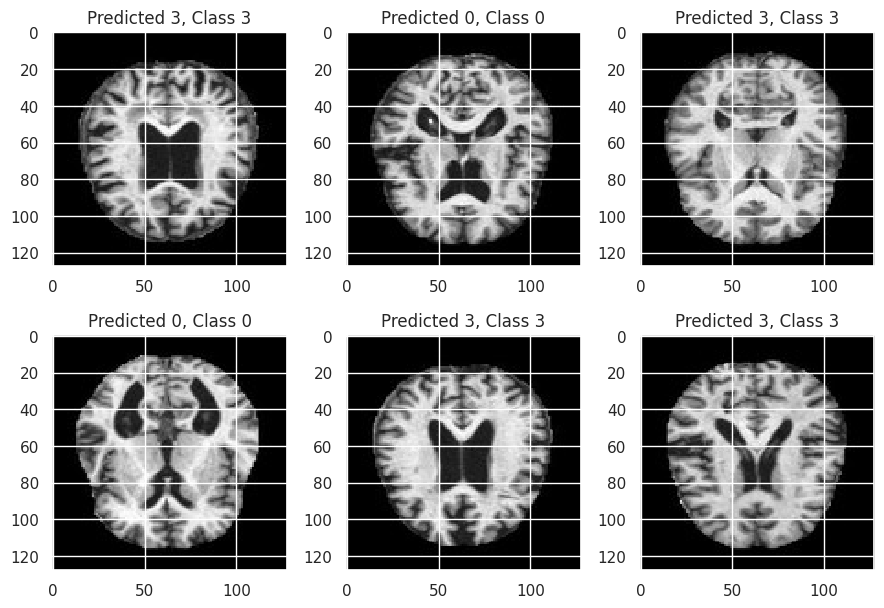

In [20]:
plt.figure()
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(3,3,i+1)
    # Assuming your images are 128x128, adjust as needed
    image_shape = (int(np.sqrt(X_val[correct].shape[0])), int(np.sqrt(X_val[correct].shape[0])))
    plt.imshow(X_val[correct].reshape(image_shape), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_val[correct]))

plt.tight_layout()


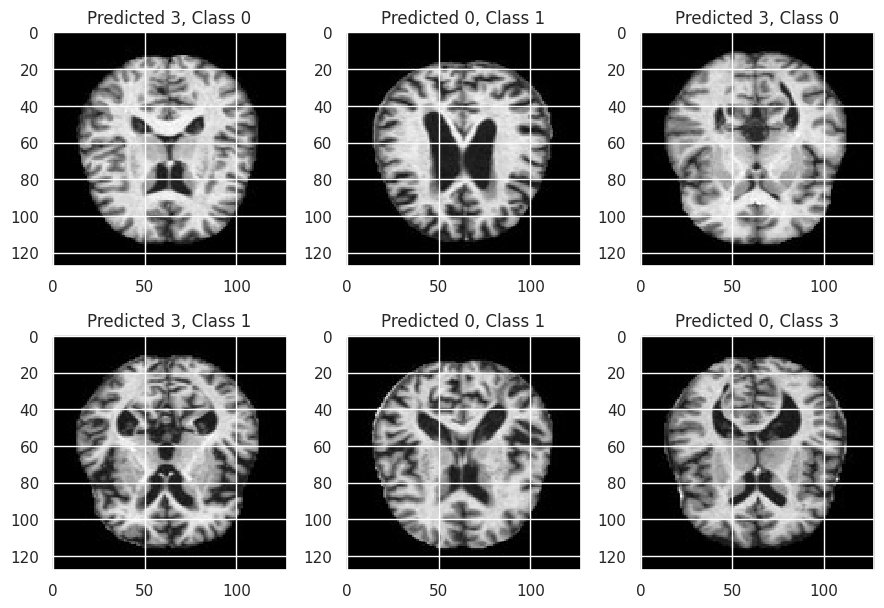

In [21]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    # Reshape to the original image size (128x128)
    plt.imshow(X_val[incorrect].reshape(128,128), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_val[incorrect]))

plt.tight_layout()

# **Let's go Deeper**
We will add four more layers to our model. We use Droupout in our model to reduce overfitting

In [24]:
# Dropout helps protect the model from memorizing or "overfitting" the training data.
Pkeep=0.25
modelDeepFC = Sequential([
    Dense(200, input_shape=(num_features,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(100, input_shape=(200,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(60, input_shape=(100,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(30, input_shape=(60,)),
    Activation('relu'),
    Dropout(Pkeep),
    Dense(4),
    Activation('softmax'),
])
modelDeepFC.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 200)                 │       3,277,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │             124 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,114 (12.61 MB)

 Trainable params: 3,305,114 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

TypeError: 'tuple' object is not callable

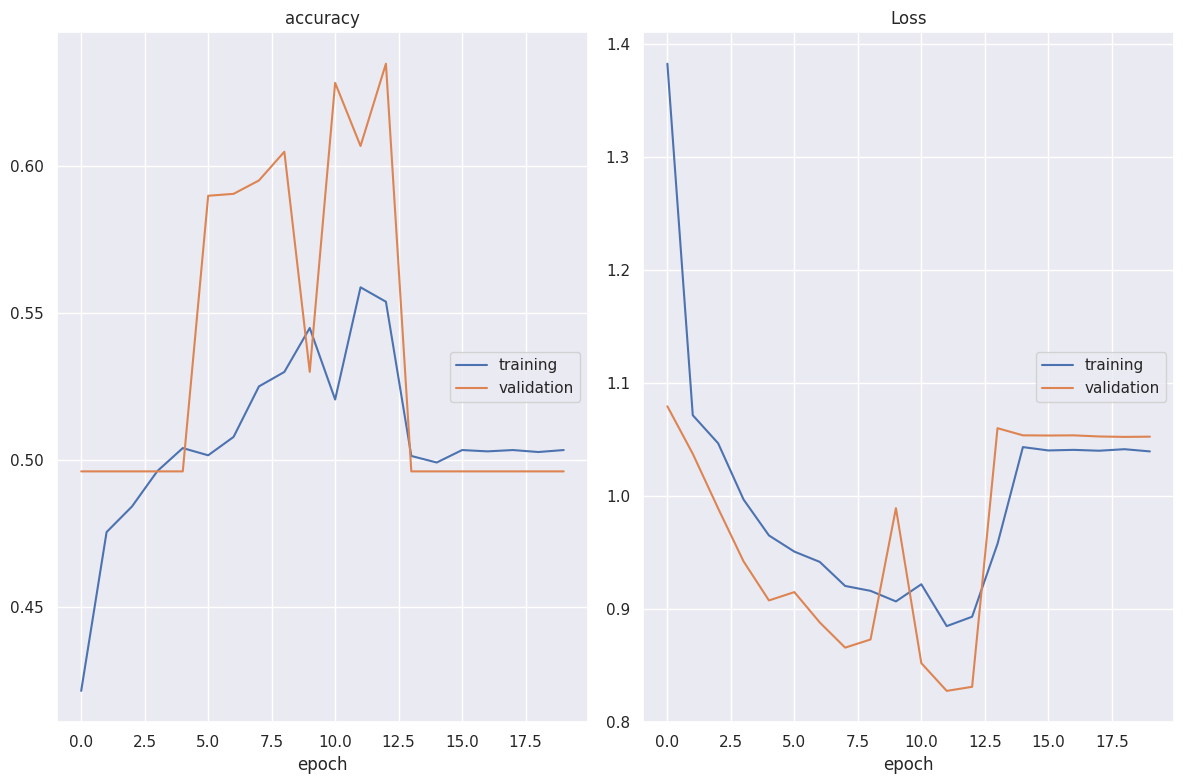

accuracy
	training         	 (min:    0.421, max:    0.559, cur:    0.503)
	validation       	 (min:    0.496, max:    0.635, cur:    0.496)
Loss
	training         	 (min:    0.885, max:    1.383, cur:    1.040)
	validation       	 (min:    0.828, max:    1.079, cur:    1.053)
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5120 - loss: 1.0335 - val_accuracy: 0.4961 - val_loss: 1.0526


In [23]:
plotlossesdeeper = PlotLossesKeras()
modelDeepFC.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelDeepFC.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20, batch_size=32,
          verbose=1,
          callbacks=[plotlossesdeeper])

The performance of the last model with more layers showed a better performance compare with our first model.

# **Let's go furter with introducing CNN**
Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. curvature, edges) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies kernels (filters) that traverse through each image and generate feature maps.

In [26]:
# import some additional tools
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

In [27]:
images = []
labels = []
for img_path in very_mild:
  images.append(imread(img_path))  # Assuming you have a function to read image data
  labels.append(0) # 0 for 'very_mild'
for img_path in mild:
  images.append(imread(img_path))
  labels.append(1) # 1 for 'mild'
for img_path in moderate:
  images.append(imread(img_path))
  labels.append(2) # 2 for 'moderate'
for img_path in non:
  images.append(imread(img_path))
  labels.append(3) # 3 for 'non'

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Flatten the image data (optional, depending on your model)
# images = images.reshape(images.shape[0], -1)


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

# Now you have x_train, x_test, y_train, y_test ready for your model
# Use these variables to train and evaluate your model.


In [28]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first
img_height = X_train.shape[1]
img_width = X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], img_height, img_width, 1).astype('float32') #add an additional dimension to represent the single-channel
X_val = X_val.reshape(X_val.shape[0], img_height, img_width, 1).astype('float32') # Use X_val here, not X_test

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_val /= 255                                 # Use X_val here, not X_test

print("Training matrix shape", X_train.shape)
print("Validation matrix shape", X_val.shape)

Training matrix shape (5120, 128, 128, 1)
Validation matrix shape (1536, 128, 128, 1)


In [29]:
# one hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [30]:
modelCNN = Sequential([

    # Convolution Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)), # 32 different 3x3 kernels -- so 32 feature maps
    MaxPooling2D(pool_size=(2, 2)), # Pool the max values over a 2x2 kernel

    # Convolution Layer 2
    Conv2D(64, (3, 3), activation='relu'), # 64 different 3x3 kernels
    MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer 3
    Conv2D(128, (3, 3), activation='relu'), # 128 different 3x3 kernels

    Flatten(), # Flatten final 7x7x128 output matrix into a 1024-length vector

    # Fully Connected Layer 4
    Dense(512), # 512 FCN nodes
    Activation('relu'),
    Dropout(0.2),
    Dense(4),
    Activation('softmax'),
])
modelCNN.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │           2,052 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,475,460 (196.36 MB)

 Trainable params: 51,475,460 (196.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

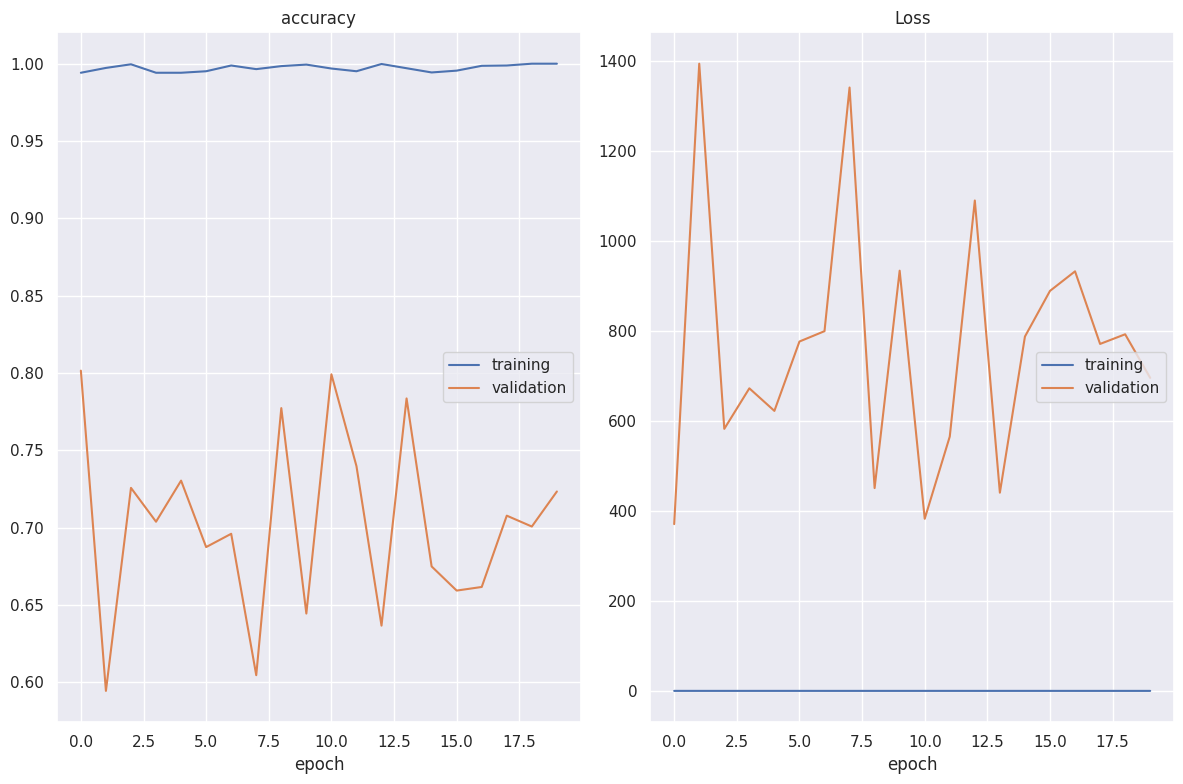

accuracy
	training         	 (min:    0.994, max:    1.000, cur:    1.000)
	validation       	 (min:    0.595, max:    0.802, cur:    0.723)
Loss
	training         	 (min:    0.000, max:    0.018, cur:    0.000)
	validation       	 (min:  370.501, max: 1393.367, cur:  695.423)
160/160 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 1.0000 - loss: 1.9744e-04 - val_accuracy: 0.7234 - val_loss: 695.4231


In [32]:
plotlossesCNN = PlotLossesKeras()
modelCNN.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

modelCNN.fit(X_train, Y_train,
          validation_data=(X_test, Y_test),
          epochs=20, batch_size=32,
          verbose=1,
          callbacks=[plotlossesCNN, early_stopping, model_checkpoint])

**Evaluation and Prediction**

We can use our model to make a prediction on new images.

In [34]:
modelCNN.evaluate(X_test,Y_test) #Evaluation of the model on the test dataset

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7284 - loss: 683.6752


[695.423095703125, 0.723437488079071]

In [37]:
# The predict function outputs the probabilities for each class
# np.argmax finds the index of the class with the highest probability
predicted_classes = np.argmax(modelCNN.predict(X_test), axis=-1) # Changed model to modelCNN

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


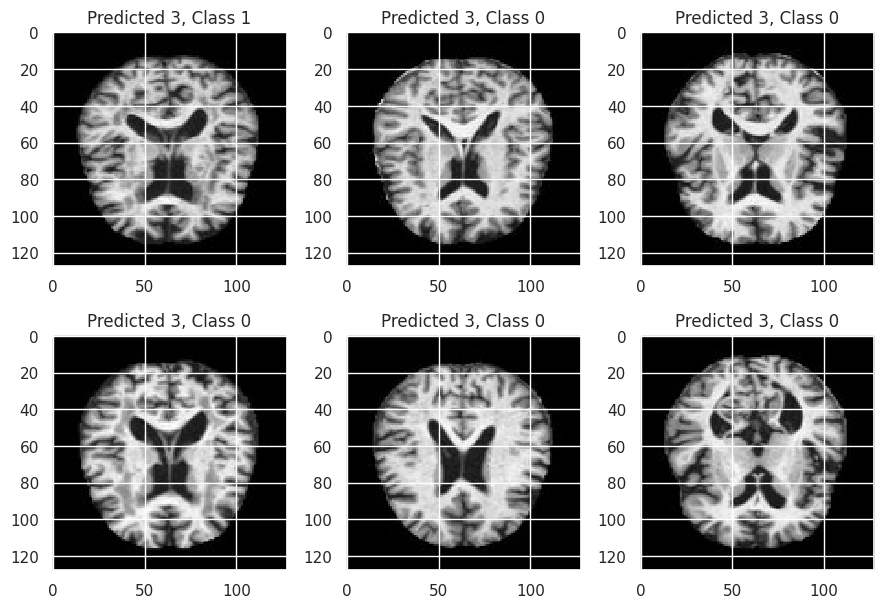

In [38]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    # Reshape to the original image size (128x128)
    plt.imshow(X_test[incorrect].reshape(128,128), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()